## Exercise 02 :
1. **Task 1:** Fourier Transform - Exploring the transformation of images to the frequency domain and analyzing their spectral properties.
2. **Task 2:** Image Sub-sampling and Anti-aliasing - Understanding how to reduce image resolution while preserving visual quality.

---

### 💡 Efficiency Note:
Since many sub-tasks within this assignment involve **similar operations** (such as **DFT computation**, **inverse DFT**, and **calculation of magnitude and phase**), I adopted a **modular approach** to minimize code redundancy. 

By reusing functions where applicable, I maintained a **clean and organized codebase**, ensuring consistency across tasks.

I hope this structured approach makes it easier to follow the implementation and understand the thought process behind each step.

In [10]:
# all imports
from typing import List, Tuple, Dict
from PIL import Image, ImageEnhance
from scipy.fftpack import fft2, ifft2
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt

### Task 1.1 :

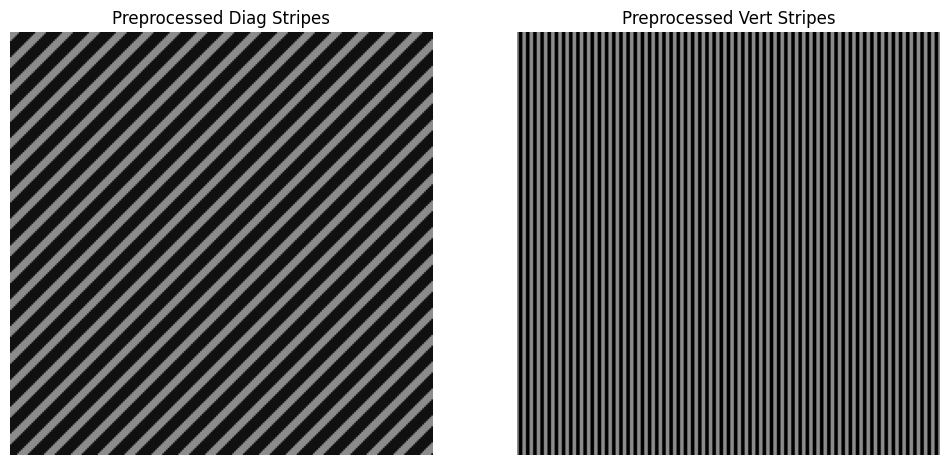

In [11]:

def loading_and_preprocess_images(file_path: str) -> np.ndarray:
    """
    Load an image from a file, convert it to grayscale, normalize to [0, 2],
    crop the central part to remove artifacts, and threshold values at 1.1.
    """
    image: Image.Image = Image.open(file_path).convert("L")
    image_np: np.ndarray = np.array(image) / 127.5
    
    cropped: np.ndarray = image_np[10:-10, 10:-10]
    cropped: np.ndarray = np.clip(cropped, 0, 1.1)
    
    return cropped

def plot_images(images: List[np.ndarray], titles: List[str])-> None:
    """Plot multiple images side by side."""
    
    fig, axes = plt.subplots(1, len(images), figsize=(12, 6))
    
    for ax, img, tit in zip(axes, images, titles):
        ax.imshow(img, cmap="gray",vmin=0, vmax=2)
        ax.set_title(tit)
        ax.axis("off")
        
    plt.show()

image01_clean = loading_and_preprocess_images("stripes_diag.gif")
image02_clean = loading_and_preprocess_images("stripes_vert.gif")
plot_images([image01_clean, image02_clean],["Preprocessed Diag Stripes", "Preprocessed Vert Stripes"])    

### Task 1.2

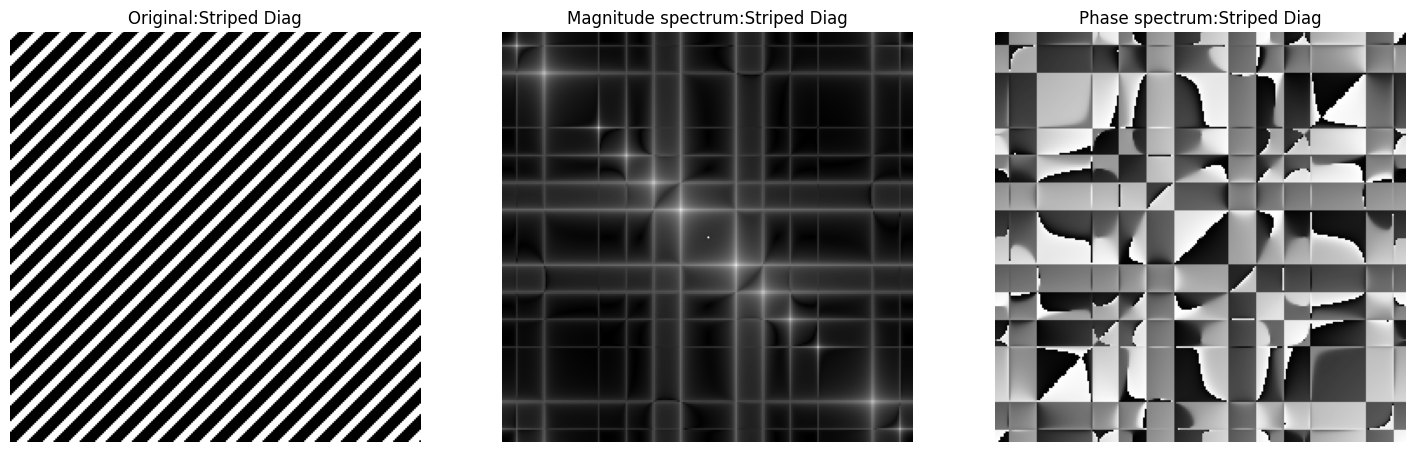

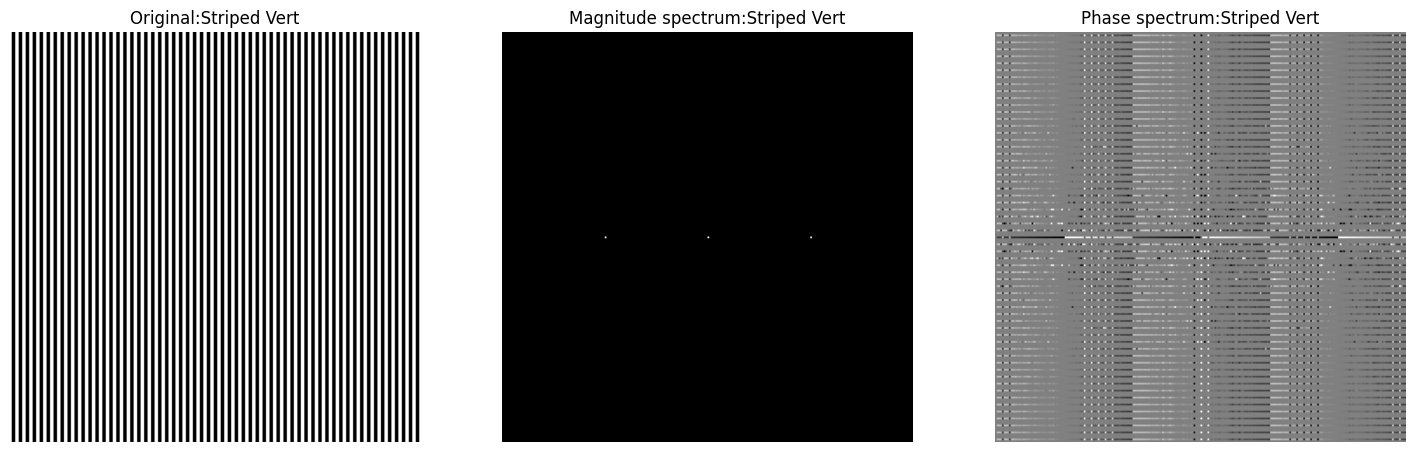

In [12]:

def compute_dft(image: np.ndarray)-> np.ndarray:
    """Compute the 2D Discrete Fourier Transform (DFT) and shift the zero-frequency component to the center."""
    
    dft = fft2(image)
    shift_dft = np.fft.fftshift(dft)
    return shift_dft

def calculate_magnitude_phase(dft_shifted: np.ndarray)-> Tuple[np.ndarray, np.ndarray]:
    """Calculate the magnitude and phase from the shifted DFT."""
    
    magnitude: np.ndarray = np.log(1 + np.abs(dft_shifted))
    phase: np.ndarray = np.angle(dft_shifted)
    
    return magnitude, phase

def plot_dft_results(image: np.ndarray, magnitude: np.ndarray, phase: np.ndarray, title: str)-> None:
    
    fig, axes = plt.subplots(1,3, figsize=(18,6))
    
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title(f"Original:{title}")
    axes[0].axis("off")
    
    axes[1].imshow(magnitude, cmap="gray")
    axes[1].set_title(f"Magnitude spectrum:{title}")
    axes[1].axis("off")
    
    axes[2].imshow(phase, cmap="gray")
    axes[2].set_title(f"Phase spectrum:{title}")
    axes[2].axis("off")

    plt.show()
    
# Performing fourier transform and ploting the result
dft_shifted_01 = compute_dft(image01_clean)
magnitude_01, phase_01 = calculate_magnitude_phase(dft_shifted_01)
plot_dft_results(image01_clean, magnitude_01, phase_01, "Striped Diag")

dft_shifted_02 = compute_dft(image02_clean)
magnitude_02, phase_02 = calculate_magnitude_phase(dft_shifted_02)
plot_dft_results(image02_clean, magnitude_02, phase_02, "Striped Vert")
    


### Task 1.3

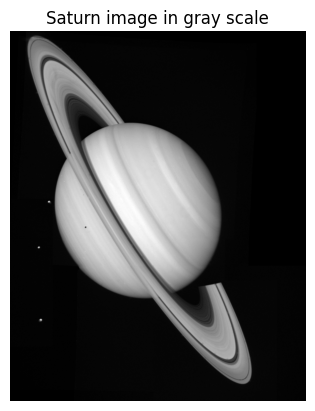

In [13]:
def load_image(file_path)-> np.ndarray:
    image: Image.Image = Image.open(file_path).convert("L")
    image_np: np.ndarray = np.array(image)
    return image_np

def plot_image(image:np.ndarray, title:str)-> None:
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

sat_image: np.ndarray = load_image("saturn.png")
plot_image(sat_image, "Saturn image in gray scale")
    

### Task 1.4 

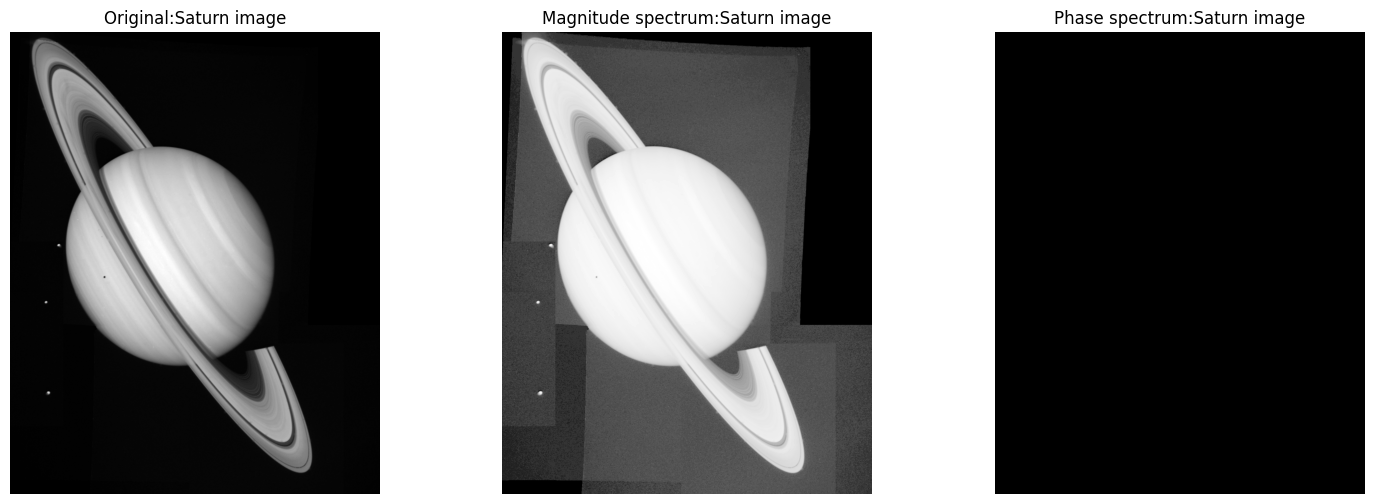

In [14]:
# Applying fourier transformation and plotting using already implemented functions
sat_image = load_image("saturn.png")
sat_magnitude, sat_phase = calculate_magnitude_phase(sat_image)
plot_dft_results(sat_image, sat_magnitude, sat_phase, "Saturn image")


### Task 1.5:
- Now change the image in the original pixel domain by : rotating the image, changing contrast, flipping 45° or 90°

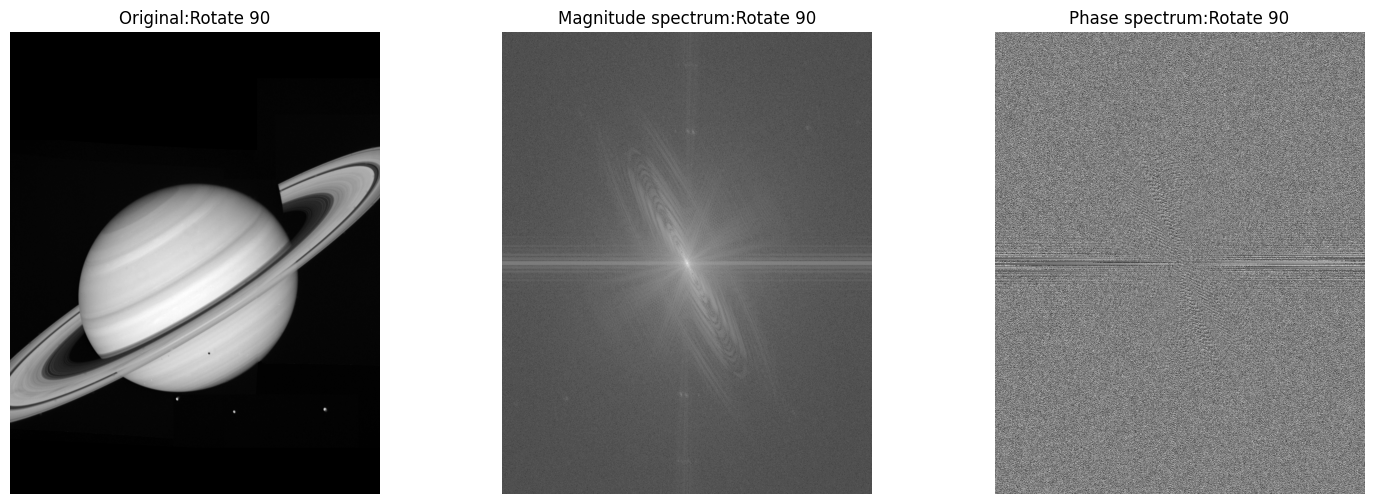

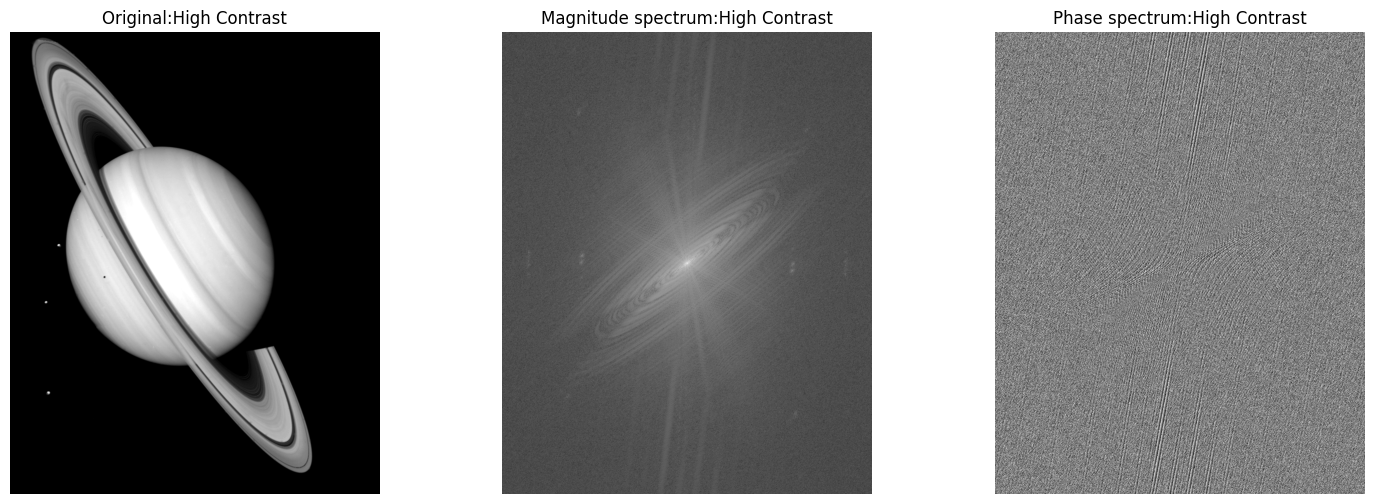

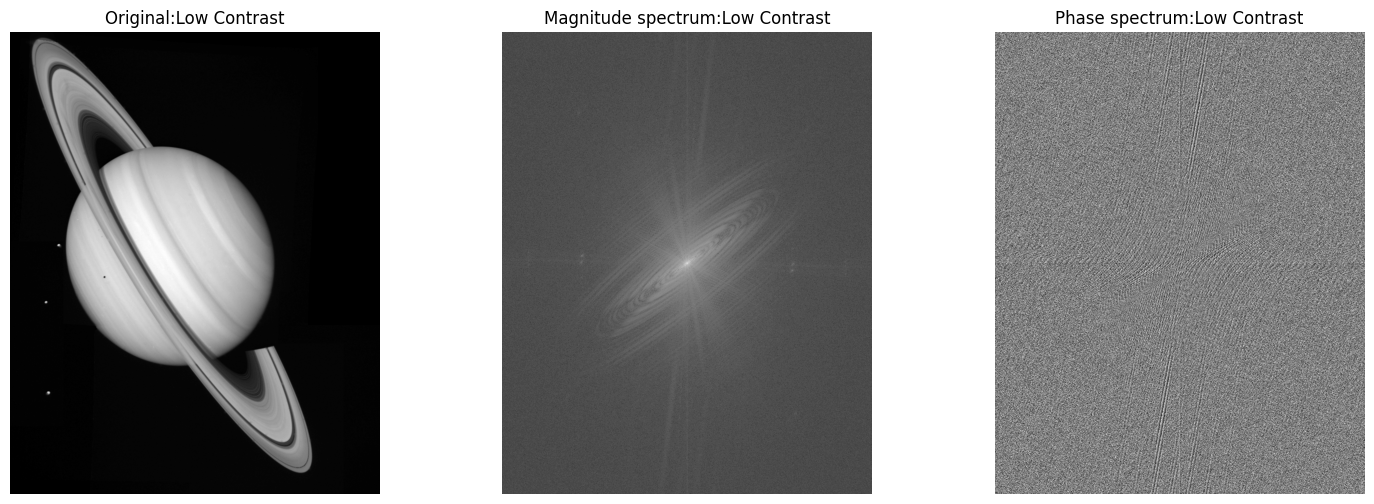

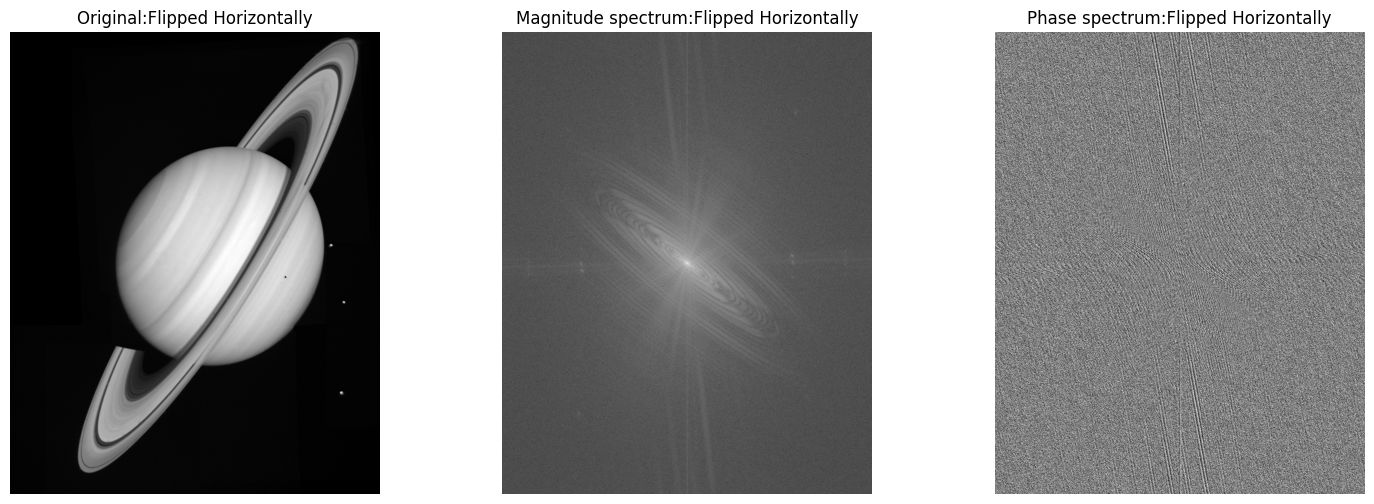

In [6]:
def rotate_image(image: np.ndarray, angle: float)-> np.ndarray:
    rotated = Image.fromarray(image).rotate(angle)
    return np.array(rotated)

def change_contrast(image: np.ndarray, by_factor: float)-> np.ndarray:
    enhancer = ImageEnhance.Contrast(Image.fromarray(image))
    contraster = enhancer.enhance(by_factor)
    return np.array(contraster)

def flip_image(image: np.ndarray)-> np.ndarray:
    flip = Image.fromarray(image).transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    return np.array(flip)

# Image transformation in a Dictionnary for easy look-up :)
transformations: Dict[str, np.ndarray] = {
    "Rotate 90": rotate_image(sat_image, 90),
    "High Contrast": change_contrast(sat_image, 1.5),
    "Low Contrast": change_contrast(sat_image, 0.5),
    "Flipped Horizontally": flip_image(sat_image)
}

# Processing and plotting the DFT results
for title, trans in transformations.items():
    dft_shift = compute_dft(trans)
    magnitude, phase = calculate_magnitude_phase(dft_shift)
    plot_dft_results(trans, magnitude, phase, title)
    

    

### Effect of Transformations on the DFT Domain

The transformations affected the DFT domain as follows:

- **Rotation:** The **magnitude and phase spectra** both rotate by the same angle as the image, reflecting the **rotational symmetry** of the Fourier Transform.

- **Contrast Adjustment:** The **magnitude spectrum** becomes brighter with increased contrast and darker with decreased contrast, while the **phase spectrum** remains almost unchanged, as contrast only affects intensity.

- **Horizontal Flip:** The **magnitude spectrum** remains the same, but the **phase spectrum** flips horizontally, reflecting the change in **spatial orientation**.

**Summary:** The **magnitude** spectrum is mainly affected by **contrast changes**, while the **phase spectrum** is more sensitive to **spatial transformations** like rotation and flipping.


### Task 1.6

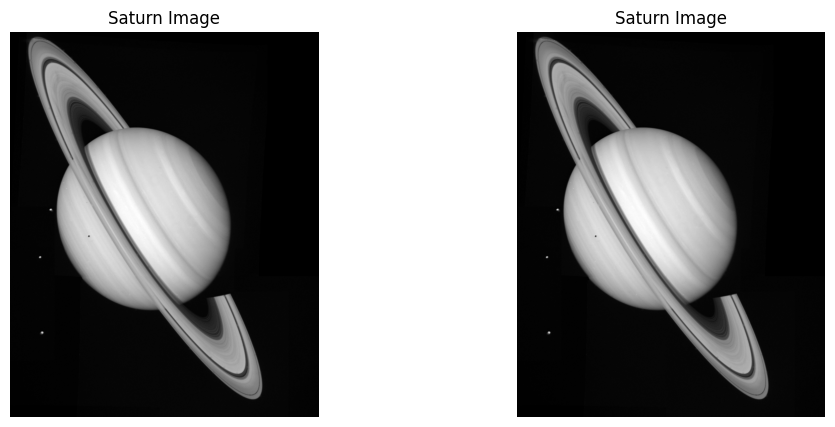

In [7]:
def inverse_dft(dft_shifted:np.ndarray)-> np.ndarray:
    
    dft_unshifted = np.fft.ifftshift(dft_shifted)
    reconstruct = ifft2(dft_unshifted)
    # using abs to avoid complex numbers
    return np.abs(reconstruct)

def plot_comparison(originale_img: np.ndarray, reconstructed: np.ndarray, title: str)-> None:
    
    fig, axes = plt.subplots(1,2,figsize=(12,5))
    
    axes[0].imshow(originale_img, cmap="gray")
    axes[0].set_title(title)
    axes[0].axis("off")
    
    axes[1].imshow(reconstructed, cmap="gray")
    axes[1].set_title(title)
    axes[1].axis("off")
    
    plt.show()
    
dft_shift_sat = compute_dft(sat_image)
reconstructed_sat = inverse_dft(dft_shift_sat)
plot_comparison(sat_image, reconstructed_sat, "Saturn Image")
    

The original Saturn image and the reconstructed image appear identical because the **Fourier Transform (DFT)** and **Inverse Fourier Transform (IDFT)** are **mathematical inverses**. 

### Task 1.7

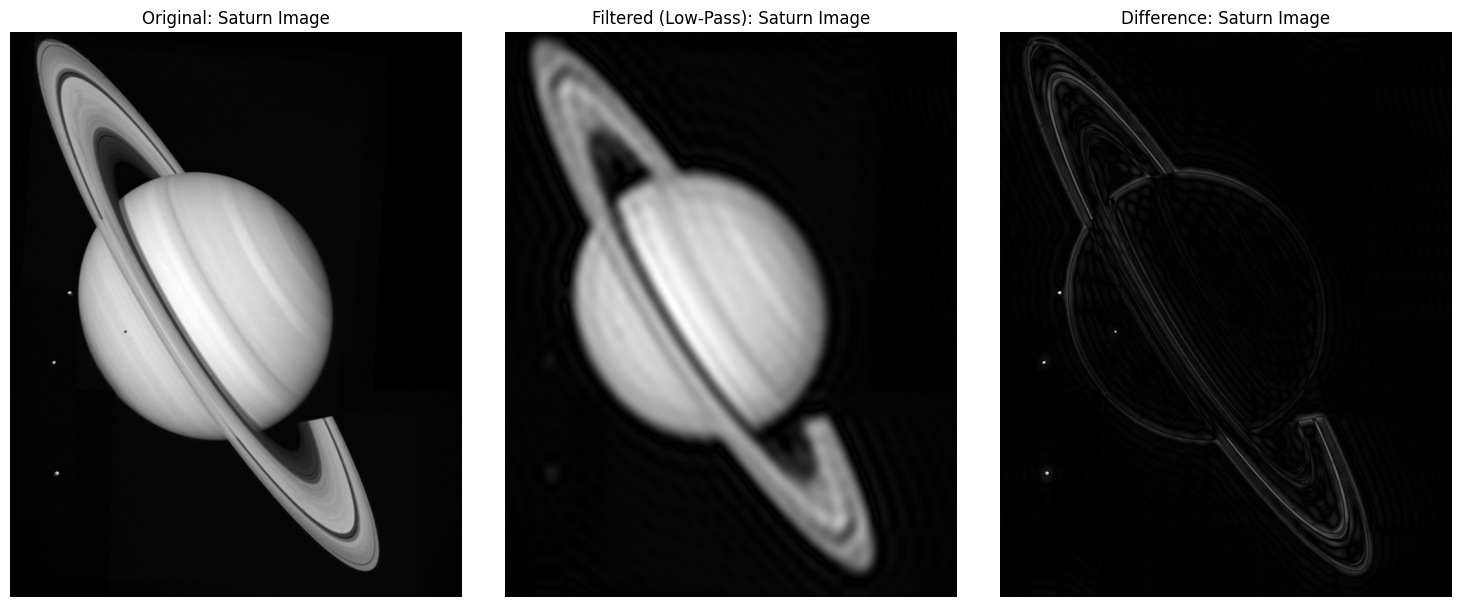

In [8]:
def low_pass_filter(dft_shifted: np.ndarray, size: int)->np.ndarray:
    h, w = dft_shifted.shape
    center_h, center_w = h // 2, w // 2
    
    mask = np.zeros_like(dft_shifted)
    half_size = size // 2
    mask[center_h - half_size:center_h + half_size, center_w - half_size:center_w + half_size] = 1
    
    filtered_dft = dft_shifted * mask
    
    return filtered_dft

def plot_comparisons(origianl: np.ndarray, filtered: np.ndarray, difference: np.ndarray, title: str)-> None:
    fig, axes = plt.subplots(1,3,figsize= (15,6))
    
    axes[0].imshow(origianl, cmap="gray")
    axes[0].set_title(f"Original: {title}")
    axes[0].axis("off")
    
    axes[1].imshow(filtered, cmap="gray")
    axes[1].set_title(f"Filtered (Low-Pass): {title}")
    axes[1].axis("off")
    
    axes[2].imshow(np.clip(difference, 0 ,255), cmap="gray")
    axes[2].set_title(f"Difference: {title}")
    axes[2].axis("off")
    
    plt.tight_layout()
    plt.show()
    
    
filtered_dft = low_pass_filter(dft_shift_sat, size=50)
filtered_image = inverse_dft(filtered_dft)

difference = np.abs(sat_image -filtered_image)

plot_comparisons(sat_image, filtered_image, difference, "Saturn Image")

    

### Task 1.8

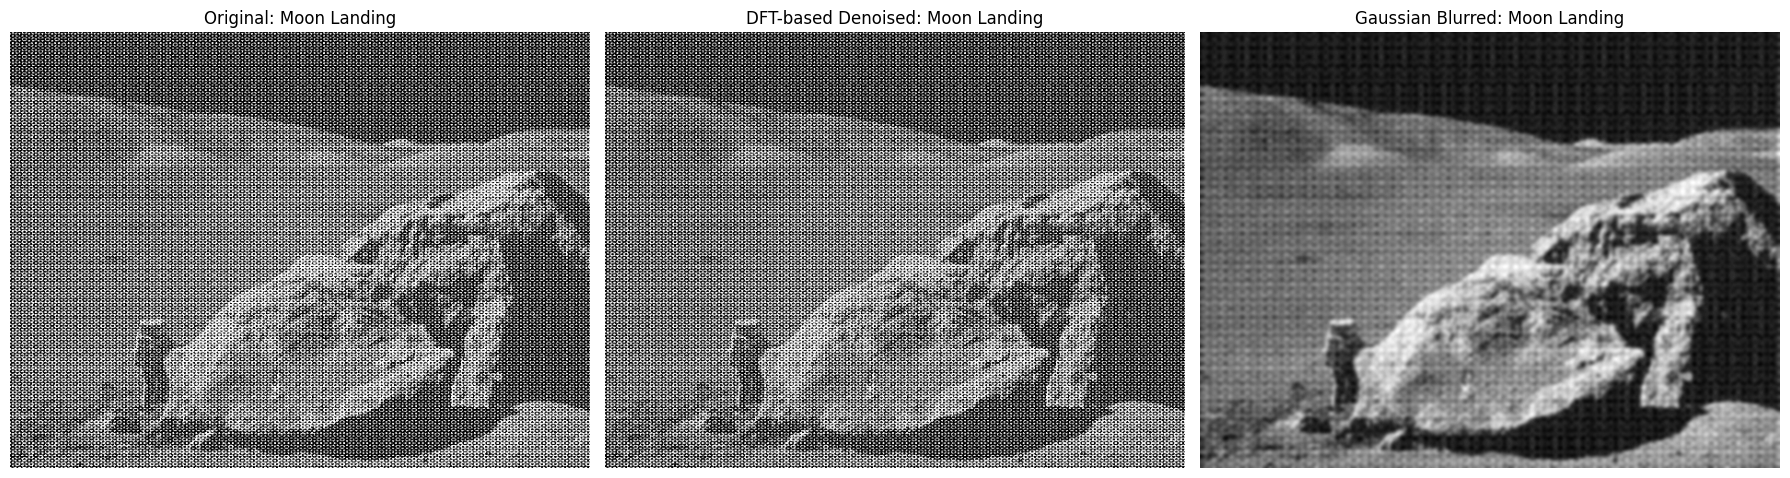

In [9]:
def high_pass_filter(dft_shifted: np.ndarray, threshold: float) -> np.ndarray:
    
    magnitude = np.abs(dft_shifted)
    mask = magnitude > threshold  # Keep only components greater than the threshold
    filtered_dft = dft_shifted * mask
    return filtered_dft

def gaussian_blur(image: np.ndarray, sigma: float)-> np.ndarray:
    return gaussian_filter(image, sigma=sigma)
    
def plot_moon_comparison(original: np.ndarray, denoised_dft: np.ndarray, denoised_blur: np.ndarray, title: str) -> None:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(original, cmap="gray")
    axes[0].set_title(f"Original: {title}")
    axes[0].axis("off")

    axes[1].imshow(denoised_dft, cmap="gray")
    axes[1].set_title(f"DFT-based Denoised: {title}")
    axes[1].axis("off")

    axes[2].imshow(denoised_blur, cmap="gray")
    axes[2].set_title(f"Gaussian Blurred: {title}")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()
    
    
moon_land = load_image("moonlanding.png")
moon_land_dft = compute_dft(moon_land)
threshold = 3000
high_pass_filter_moon_land = high_pass_filter(moon_land_dft, threshold)
denoised_dft_moon_land = inverse_dft(high_pass_filter_moon_land)
sigma = 2.0
gaussian_denoised = gaussian_blur(moon_land, sigma)
plot_moon_comparison(moon_land, denoised_dft_moon_land, gaussian_denoised, "Moon Landing")


